In [48]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [49]:
load_dotenv()

True

In [50]:
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [51]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    

In [52]:
def create_outline(state: BlogState) -> BlogState:

    title = state['title']

    prompt = f'generate a detailed outline for a bolg on the topic {title}'
    outline = model.invoke(prompt).content

    state['outline'] = outline

    return state

In [53]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'write a detailed blog on the title - {title} using the following outline \n - {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [54]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

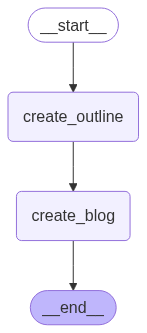

In [55]:
workflow

In [56]:
result = ({'title': 'it companies in india'})

answer = workflow.invoke(result)

print(answer)

{'title': 'it companies in india', 'outline': 'Here\'s a detailed outline for a blog post on "IT Companies in India," designed to be comprehensive, engaging, and informative for a broad audience.\n\n---\n\n## Blog Title Options:\n\n*   **The Tech Titans of the East: A Deep Dive into IT Companies in India**\n*   **India\'s Digital Revolution: Unpacking the Landscape of IT Companies**\n*   **Beyond Outsourcing: The Evolving World of IT Companies in India**\n*   **From Silicon Valley to Silicon India: A Guide to the Nation\'s IT Powerhouses**\n\n---\n\n## **I. Introduction**\n\n*   **A. Hook:** Start with India\'s global reputation as a tech hub and its significant contribution to the world\'s digital economy.\n    *   *Example:* "When you think of global tech innovation, names like Silicon Valley often come to mind. But increasingly, the spotlight is turning towards another powerhouse: India."\n*   **B. Brief Overview:**\n    *   Highlight the scale and growth of the Indian IT industry.\

In [57]:
print(answer['outline'])

Here's a detailed outline for a blog post on "IT Companies in India," designed to be comprehensive, engaging, and informative for a broad audience.

---

## Blog Title Options:

*   **The Tech Titans of the East: A Deep Dive into IT Companies in India**
*   **India's Digital Revolution: Unpacking the Landscape of IT Companies**
*   **Beyond Outsourcing: The Evolving World of IT Companies in India**
*   **From Silicon Valley to Silicon India: A Guide to the Nation's IT Powerhouses**

---

## **I. Introduction**

*   **A. Hook:** Start with India's global reputation as a tech hub and its significant contribution to the world's digital economy.
    *   *Example:* "When you think of global tech innovation, names like Silicon Valley often come to mind. But increasingly, the spotlight is turning towards another powerhouse: India."
*   **B. Brief Overview:**
    *   Highlight the scale and growth of the Indian IT industry.
    *   Mention its economic impact (GDP contribution, job creation).
